# Answers to question 4

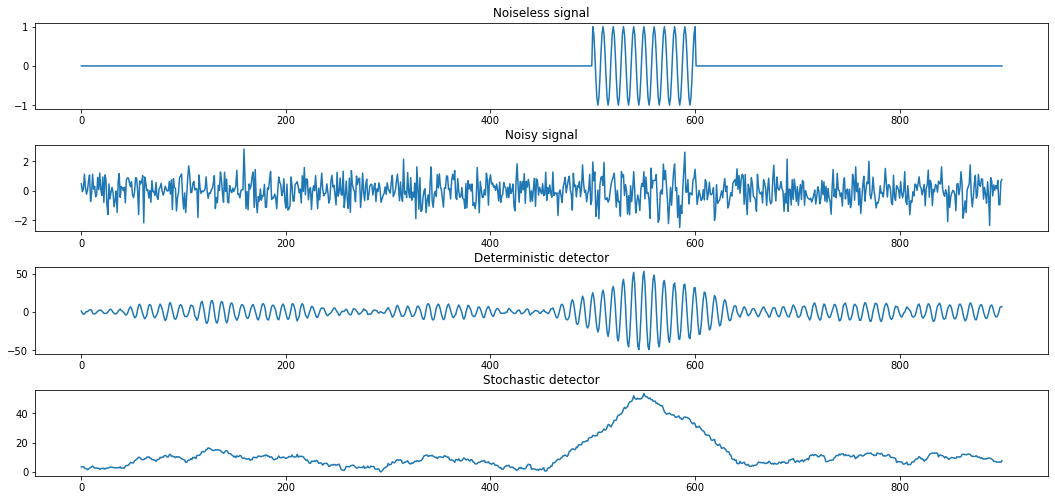

In [1]:
"Answers to question 4."

import numpy as np
import matplotlib.pyplot as plt

# a) Create a vector of zero and sinusoidal components
zeros = np.zeros(500)
n = np.arange(500, 601)
sinusoid = np.cos(2 * np.pi * 0.1 * n)
y = np.concatenate([zeros, sinusoid])
y = np.concatenate([y, np.zeros(300)])

# b) Create a noisy version of the signal x[n]
y_n = y + np.sqrt(0.5) * np.random.randn(y.size)

# c) Implement the deterministic sinusoid detector
y_d = np.convolve(sinusoid, y_n, 'same')

# d)  Implement the random signal version
e = np.exp(-2 * np.pi * 1j * 0.1 * n)
y_r = np.abs( np.convolve(e, y_n, 'same') )

# e) Generate plots
fig, ax = plt.subplots(4, 1, figsize=(15, 7))
fig.tight_layout(pad=1.5)

ax[0].plot(y)
ax[0].title.set_text('Noiseless signal')
ax[1].plot(y_n)
ax[1].title.set_text('Noisy signal')
ax[2].plot(y_d)
ax[2].title.set_text('Deterministic detector')
ax[3].plot(y_r)
ax[3].title.set_text('Stochastic detector')

# Answers to question 5

3NN-accuracy: 0.85
LDA-accuracy: 0.91
LR-accuracy: 0.92
RF-accuracy: 0.87


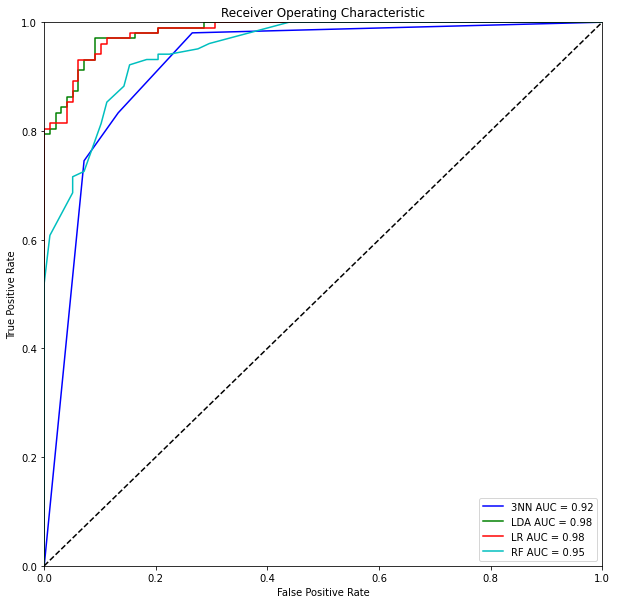

In [2]:
import numpy as np
import scipy.io

# a) Load data & split into training & testing samples
root = '/home/tuomas/Python/DATA.ML.200/Ex2/'
data = scipy.io.loadmat(root + 'twoClassData.mat')
dataX = data['X']
dataY = data['y'][0]

trainX = dataX[:200,]
trainY = dataY[:200]

testX = dataX[200:,]
testY = dataY[200:]

# 3NN-classifier
from sklearn.neighbors import KNeighborsClassifier

K = 3
KNN = KNeighborsClassifier(n_neighbors=K)
KNN.fit(trainX, trainY)
KNN_predY = KNN.predict(testX)
KNN_probs = KNN.predict_proba(testX)

KNN_acc = np.sum(testY==KNN_predY) / testY.size
print("{}NN-accuracy: {}".format(K, KNN_acc))

# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(solver='svd')
LDA.fit(trainX, trainY)
LDA_predY = LDA.predict(testX)
LDA_probs = LDA.predict_proba(testX)

LDA_acc = np.sum(testY==LDA_predY) / testY.size
print("LDA-accuracy: {}".format(LDA_acc))

# Logistic Regression
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(trainX, trainY)
LR_predY = LR.predict(testX)
LR_probs = LR.predict_proba(testX)

LR_acc = np.sum(testY==LR_predY) / testY.size
print("LR-accuracy: {}".format(LR_acc))

# Random Forest
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20)
RF.fit(trainX, trainY)
RF_predY = RF.predict(testX)
RF_probs = RF.predict_proba(testX)

RF_acc = np.sum(testY==RF_predY) / testY.size
print("RF-accuracy: {}".format(RF_acc))

# ROC & AUC for each classifier
from sklearn import metrics

KNN_fpr, KNN_tpr, th = metrics.roc_curve(testY, KNN_probs[:,1])
KNN_auc = metrics.auc(KNN_fpr, KNN_tpr)

LDA_fpr, LDA_tpr, th = metrics.roc_curve(testY, LDA_probs[:,1], pos_label=1)
LDA_auc = metrics.auc(LDA_fpr, LDA_tpr)

LR_fpr, LR_tpr, th = metrics.roc_curve(testY, LR_probs[:,1], pos_label=1)
LR_auc = metrics.auc(LR_fpr, LR_tpr)

RF_fpr, RF_tpr, th = metrics.roc_curve(testY, RF_probs[:,1], pos_label=1)
RF_auc = metrics.auc(RF_fpr, RF_tpr)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(KNN_fpr, KNN_tpr, '-b', label = '3NN AUC = {}'.format(np.round(KNN_auc,2)))
plt.plot(LDA_fpr, LDA_tpr, '-g', label = 'LDA AUC = {}'.format(np.round(LDA_auc,2)))
plt.plot(LR_fpr, LR_tpr, '-r', label = 'LR AUC = {}'.format(np.round(LR_auc,2)))
plt.plot(RF_fpr, RF_tpr, '-c', label = 'RF AUC = {}'.format(np.round(RF_auc,2)))

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'--k')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

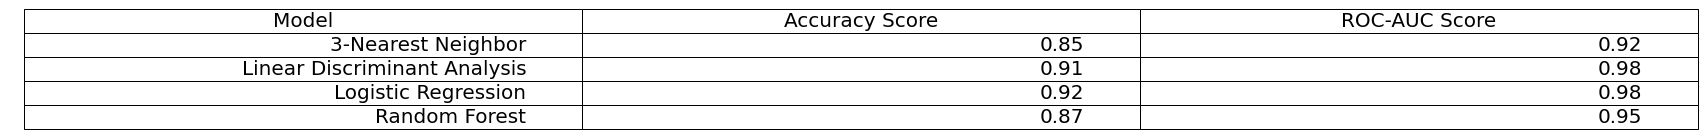

In [3]:
# b) Fill in the attached table
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,2))
ax.axis('off')
ax.axis('tight')

col_names = ['Model', 'Accuracy Score', 'ROC-AUC Score']
names = ['3-Nearest Neighbor','Linear Discriminant Analysis','Logistic Regression','Random Forest']
accs = [KNN_acc, LDA_acc, LR_acc, RF_acc]
roc_aucs = np.round([KNN_auc, LDA_auc, LR_auc, RF_auc], 2)

df = pd.DataFrame({'Model':names, 'Accuracy Score':accs, 'ROC-AUC Score':roc_aucs})

table = ax.table(cellText=df.values, colLabels=df.columns, loc='upper left')
table.set_fontsize(20)
table.scale(2, 2)
plt.show()
